 <h1 style="text-align: center; color: RED">ÖZELLİK MÜHENDİSLİĞİ VE VERİ ÖN İŞLEME</h1>

Özellik mühendisliği, özellikler üzerinden gerçekleştirilen çalışmalar ve ham veriden değişken üretmektir.

Veri ön işleme, çalışmlar öncesi verinin uygun hale getirilmesi sürecidir.

![Test](datasets/1.png) 


<h2 style="text-align: center; color: RED">OUTLİERS</h2>

Verideki genel eğilimin oldukça dışına çıkan değerlere aykırı değer denir.Aykırı değer (outlier), verisetinde "normal" dağılımdan sapmış, diğerlerine göre "olağandışı" olan gözlemdir. Veri setine aykırı değer eklendiğinde nasıl bir etki oldugunu grafik üzerinden inceleyelim:

![Test](datasets/2.png) 

Aykırı değerler çeşitli yöntemler ile tespit edilebilir:

1-) Sektör Bilgisi

2-) Standart Sapma Yaklaşımı

3-) Z- Skoru Yaklaşımı

4-) Boxplot(interquartile range-IQR) Yöntemi
![Test](datasets/3.png)

<span style="color: blue; font-weight: bold;">AYKIRI DEĞERLERİ YAKALAMA</span>

In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno #eksik değerler için kullanılan bir kütüphane
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [3]:
#Görsel ayaralama için
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

* Okuttuğumuz bu iki veri seti üzerinden işlemler yapacaz.

In [139]:
def load_application_train():
    data = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\6.Feature Engineering\\datasets\\application_train.csv")
    return data
    

In [141]:
def load():
    data = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\6.Feature Engineering\\datasets\\titanic.csv")
    return data
    

In [143]:
df1 = load_application_train()
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [145]:
df2 = load()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


**1-Grafik Teknikle Aykırı Değerleri İnceleme**

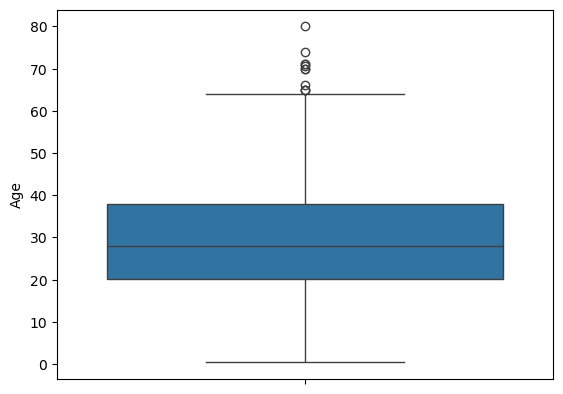

In [23]:
sns.boxplot(df2['Age'])# yaşa değişkenini boxplot yani kutu grafiği ile inceleme
plt.show()

**2-Aykırı Değerler Nasıl Yakalanır?**

In [27]:
#İLk olarak q1 ve q3 olan ceyreklik değerleri bulucaz

q1 = df2['Age'].quantile(0.25)
q1

20.125

In [29]:
q3 = df2['Age'].quantile(0.75)
q3

38.0

In [33]:
#Ceyreklik değerler arasındaki fark
IQR = q3-q1
IQR

17.875

In [35]:
#UP ve low limit 
up = q3 + 1.5*IQR
up

64.8125

In [37]:
low = q1- 1.5*IQR
low

-6.6875

In [39]:
#up ve low limit dışında kalan değişkenler

df2[(df2['Age'] < low) | (df2['Age'] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [41]:
df2[(df2['Age'] < low) | (df2['Age'] > up)].index # aykırı değer olanların indexleri

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [43]:
df2[(df2['Age'] < low) | (df2['Age'] > up)].any(axis=None) #herhangi bir satır ya da sutund eksik değer var mı diye sorduk

True

**3-İşlemleri Fonksiyonlaştırma**

In [169]:
#Eşik değer hesaplama
def outlier_tresholds(dataframe, col_name, q1=0.25, q3=0.75):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    IQR = q3 -q1
    up_limit = q3 + 1.5*IQR
    low_limit = q1 - 1.5*IQR
    return low_limit, up_limit
    

In [57]:
outlier_tresholds(df2, 'Age')

(-6.6875, 64.8125)

In [59]:
outlier_tresholds(df2, 'Fare')

(-26.724, 65.6344)

In [187]:
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_tresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit)|(dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [71]:
check_outliers(df2, 'Age')

True

**DEĞİŞKENLERİN YAKALANMASI VE İŞLEMLERİN GENELLEŞTİRİLMESİ**

In [147]:
def grab_col_names(dataframe, cat_th=10, car_th=20):#parametrelerin ön tanımlı değerlerini burda belirttik
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal degiskenlerin isimlerini verir.--
    Parameters
    ----------
    dataframe: dataframa
        degisken isimleri alınmak istenen dataframedir.
    cat_th: int, float
        numerik fakat kategorik olan degiskenler için sınıf eşik degeri
    car_th: int, float
        kategorik fakat kardinal degiskenler icin sınıf esik degeri

    Returns
    -------
    cat_cols: list
        kategorik degisken listesi
    num_cols: list
        numerik degisken listesi
    cat_but_car: list
        kategorik gorunumlu kardinal degisken listesi
    Notes
    -------
    cat_cols+num_cols+cat_but_car=toplam degisken sayısı
    num_but_cat cat_cols'un içerisindedir.
    Return olan 3 liste toplamı degisken sayısına eşittir: cat_cols +num_cols+cat_but_car
    """
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category', 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category'] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes  in ['int64', 'float64']] #bu sayısal değişkenleri verir
    num_cols = [col for col in num_cols if col not in cat_cols] 

    print(f'Observetions: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [149]:
cat_cols, num_cols, cat_but_car = grab_col_names(df2)

Observetions: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [151]:
num_cols

['PassengerId', 'Age', 'Fare']

In [153]:
num_cols = [col for col in num_cols if col not in "PassengerId"]#işimize yaramadıgı için cıkardık

In [92]:
num_cols

['Age', 'Fare']

In [104]:
for col in num_cols:
    print(col, check_outliers(df2, col))# sayısal değişkenlerde aykırı değer var mı kontrol ettik

Age True
Fare True


In [112]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)

Observetions: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [114]:
for col in num_cols:
    print(col, check_outliers(df1, col))

SK_ID_CURR False
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
B

<span style="color: blue; font-weight: bold;">AYKIRI DEĞERLERE ERİŞMEK</span>

In [124]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_tresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:#aykırı değer sayısı 10 dan büyükse ilk beş gözleme bakacaz
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])#değilse tüm aykırı değerleri göster

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [126]:
grab_outliers(df2, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


<span style="color: blue; font-weight: bold;">AYKIRI DEĞER PROBLEMİNİ ÇÖZME</span>

**1- Aykırı Değerler Silenebilir**

In [135]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_tresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name]<low_limit)|(dataframe[col_name]>up_limit))]
    return df_without_outliers

In [155]:
for col in num_cols:
    new_df = remove_outlier(df2, col)

In [157]:
df2.shape

(891, 12)

In [159]:
new_df.shape#silme işlemi gerçekleşmiş görünüyor

(775, 12)

**2- Aykırı Değerleri Baskılama**

Eşik değerlerin üzerinde kalan değerler eşik değerlere baskılanır yani eşik değere eşitlenir. Silme işleminden kaynaklı gerçekleşebilecek veri kaybının önüne geçilmiş olur.

In [173]:
low_limit, up_limit = outlier_tresholds(df2, 'Fare')

In [175]:
df2.loc[((df2['Fare'] < low_limit) | (df2['Fare'] > up_limit)),'Fare']# aykırı değer olan fare değerlerini getirdi

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [ ]:
df2.loc[ (df2['Fare'] > up_limit)),'Fare'] = up_limit #up limitin üstünde olanları up'a baskıladım

In [ ]:
df2.loc[ (df2['Fare'] < low_limit)),'Fare'] = low_limit# alt limite göre baskıladım

In [177]:
#Fonksiyonlaştırma
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_tresholds(dataframe, col_name)
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    

In [191]:
for col in num_cols:
    print(check_outliers(df2, col))

True
True


In [193]:
for col in num_cols:
    replace_with_thresholds(df2, col)

In [195]:
for col in num_cols:
    print(check_outliers(df2, col))# kontrol sağladık.

False
False


<h2 style="text-align: center; color: RED">ÇOK DEĞİŞKENLİ AYKIRI DEĞER ANALİZİ(LOCAL OUTLİER FACTOR)</h2>

Tek başına aykırı olmayan bazı değerler başka bi durumla ele alındığında aykırılık oluşturabilir. Örneğin 17 yaşında 3 kere evlenen birinin durumu buna örnek verilebilir. 17 yaşında ve 3 kere evlenmek aykırı değer değilken birlikte olamsı anormal bir durumdur.Tek değişkenli analizde: sadece bir sütun üzerinden aykırı olup olmadığına bakarsın. (örneğin Age, Salary)
Çok değişkenli analizde: birden fazla sütunun birlikte oluşturduğu örüntüye bakılır. Çünkü bazen tek tek sıradan gibi duran değerler, bir araya geldiğinde mantıksız kombinasyonlar oluşturabilir.

 Örnek:

Yaş: 25, Maaş: 15.000 TL → Normal

Yaş: 70, Maaş: 15.000 TL → Yine makul olabilir

Ama Yaş: 16, Maaş: 150.000 TL olursa bu sıra dışı bir kombinasyon olabilir. İşte burada çok değişkenli aykırılık devreye girer.

**LOF**, çok değişkenli verilerde aykırı değerleri tespit etmek için kullanılan güçlü bir yöntemdir.Her bir veri noktasının komşularıyla olan uzaklık ilişkisine bakar.

Eğer bir nokta:

* Kendi komşularına göre çok daha uzakta kalıyorsa,

* Bu noktanın yoğunluğu(etrafındaki komşular) düşükse,

* O zaman bu nokta "aykırı" olarak kabul edilir.

Yani, "Çevresindeki diğer noktalara göre bu nokta garip mi?" diye sorar LOF. K-en yakın komşu (kNN) yaklaşımıyla her nokta için komşular belirlenir.Her bir nokta için:

* Komşularına olan uzaklıklar hesaplanır

* Yoğunluk (density) değeri çıkarılır

* Diğer komşuların yoğunluğu ile kıyaslanır

Eğer bu oran > 1 ise → veri noktası potansiyel outlier’dır.(1 den uzaklaşıkça ilgili gözlemin aykırı değer olma ihtimali artar.)

![Test](datasets/4.png)

In [212]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64'])#sayısal değişkenlerisectim
df = df.dropna()#eksik değerleri sildim
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [224]:
df.shape

(53940, 7)

In [216]:
for col in df.columns:#aykırı değer var mı kontrol ettik
    print(col, check_outliers(df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [218]:
low, up = outlier_tresholds(df, 'carat')

In [222]:
df[(df['carat'] < low)|(df['carat'] > up)].shape#carat değişkeninde kac tane aykırı değer var kontrol ettik

(1889, 7)

In [228]:
df[((df['depth'] < low)|(df['depth'] > up))].shape

(53940, 7)

* Tek başına baktığımızda yüksek sayıda aykırı değer oldugunu görüyoruz.Şimdi çoklu olarak bakalım

In [232]:
clf = LocalOutlierFactor(n_neighbors=20)

In [234]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [238]:
df_scores = clf.negative_outlier_factor_

In [244]:
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [248]:
np.sort(df_scores)[0:5]#en uzak değerleri inceledik

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

* Aykırı değer için eşik değeri bulmada elbov yani dirsek yöntemini kullanacaz.En kesiskin dönüşü eşik değer olarak belirleyebiliriz.

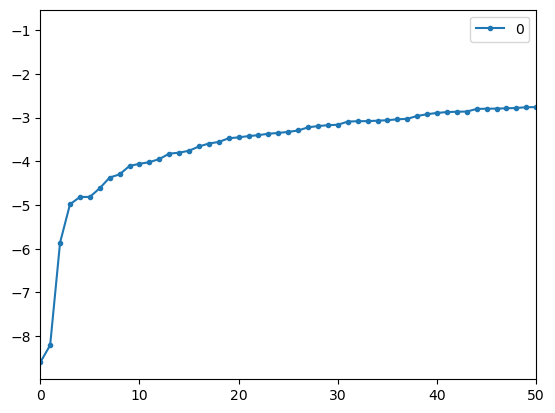

In [251]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [254]:
th = np.sort(df_scores)[3]#3. indexteki değeri eşik değer olarak belirledik
th

-4.984151747711709

In [260]:
df[df_scores < th]#çoklu bakınca sadece üç değer aykırı görünüyor

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [ ]:
#Bu değerleri veri setinden silebiliriz
df[df_scores < th].drop(axis=0, labels =df[df_scores < th].index)

* Baskılama yöntemi çok fazla değişkenin oldugu durumda istemediğimiz sonuçlara dogurabilir. Gözleme sayısı az oldugunda bu aykırı değerleri veri setinden silebiliriz.